<a href="https://colab.research.google.com/github/AlexKostjuk/Dz_13/blob/master/dz_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Імпорт бібліотек
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import kagglehub
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist



In [4]:
# Завантаження та підготовка даних
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Створення моделі (без Dropout)
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,), kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Компіляція моделі
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Тренування моделі
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_test, y_test),
                    verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8965 - loss: 0.3384 - val_accuracy: 0.9704 - val_loss: 0.0931
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9797 - loss: 0.0664 - val_accuracy: 0.9700 - val_loss: 0.0976
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9858 - loss: 0.0456 - val_accuracy: 0.9772 - val_loss: 0.0722
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9905 - loss: 0.0324 - val_accuracy: 0.9742 - val_loss: 0.0841
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9892 - loss: 0.0325 - val_accuracy: 0.9763 - val_loss: 0.0745
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9929 - loss: 0.0218 - val_accuracy: 0.9792 - val_loss: 0.0735
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9930 - loss: 0.0209 - val_accuracy: 0.9789 - val_loss: 0.0745
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9928 - loss: 0.0224 - val_accuracy: 

In [8]:

# Візуалізація результатів
plt.figure(figsize=(12, 4))


<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

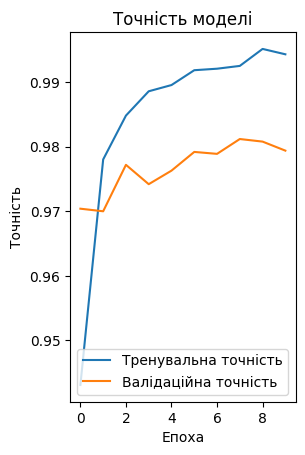

In [9]:
# Графік точності
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Тренувальна точність')
plt.plot(history.history['val_accuracy'], label='Валідаційна точність')
plt.title('Точність моделі')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()

In [10]:
predictions = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


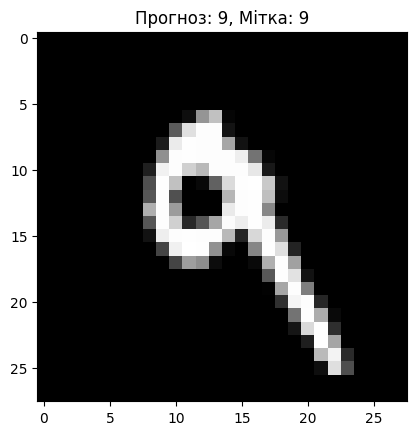

In [11]:
# Візуалізація тестового зображення
plt.figure()
plt.imshow(x_test[7].reshape(28, 28), cmap='gray')
plt.title(f'Прогноз: {np.argmax(predictions[7])}, Мітка: {np.argmax(y_test[7])}')
plt.show()

In [38]:
model_h5 = models.load_model('/content/drive/MyDrive/mnist-model.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [40]:
# Перегляд структури моделі
model_h5.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 692,684 (2.64 MB)

 Trainable params: 691,786 (2.64 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 2 (12.00 B)

In [36]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


In [37]:
train_images = train_images / 255.0

test_images = test_images / 255.0

5


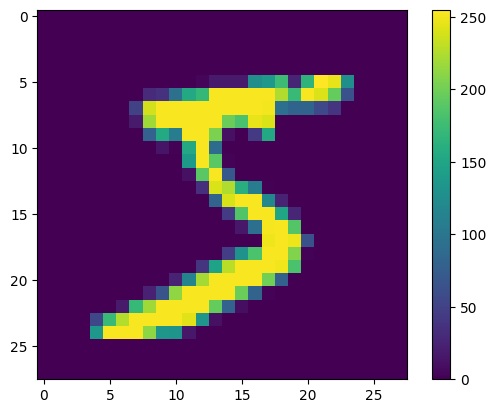

In [23]:
prevnum = 0
print(train_labels[prevnum])
plt.imshow(train_images[prevnum])
plt.colorbar()

In [43]:
model_h5.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']  # Указываем явно
)

In [44]:
test_loss, test_acc = model_h5.evaluate(test_images,  test_labels, verbose=1)

print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9926 - loss: 0.0355
Test accuracy: 0.9934999942779541


In [ ]:
# model.save('/content/drive/MyDrive/mnist-model.h5', include_optimizer=True)

In [25]:
# model = models.Sequential()

#model.add(Lambda(standardize,input_shape=(28,28,1)))
# model.add(layers.Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
# model.add(layers.Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

# model.add(layers.MaxPooling2D(pool_size=(2,2)))
# model.add(layers.BatchNormalization())
# model.add(layers.Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
# model.add(layers.Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

# model.add(layers.MaxPooling2D(pool_size=(2,2)))
# model.add(layers.BatchNormalization())
# model.add(layers.Conv2D(filters=256, kernel_size = (3,3), activation="relu"))

# model.add(layers.MaxPooling2D(pool_size=(2,2)))

# model.add(layers.Flatten())
# model.add(layers.BatchNormalization())
# model.add(layers.Dense(512,activation="relu"))

# model.add(layers.Dense(10,activation="softmax"))

In [26]:
# model.compile(
    # optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
    # loss='sparse_categorical_crossentropy',
    # metrics=['accuracy'])

In [27]:
# history = model.fit(train_images, train_labels, epochs=3, batch_size=64, validation_data=(test_images, test_labels))


Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9500 - loss: 0.1630 - val_accuracy: 0.9825 - val_loss: 0.0528
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9886 - loss: 0.0384 - val_accuracy: 0.9725 - val_loss: 0.1033
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9921 - loss: 0.0266 - val_accuracy: 0.9903 - val_loss: 0.0316


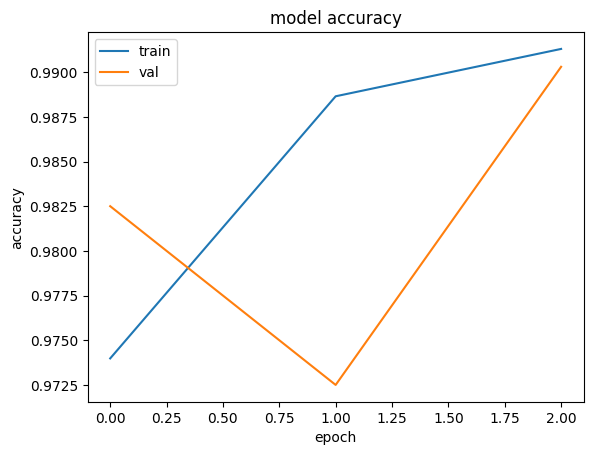

In [28]:
# from matplotlib import pyplot as plt
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
# plt.show()